In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_original = pd.read_excel('Titanic_train.xlsx')

In [5]:
test_original = pd.read_excel('Titanic_test.xlsx')

In [6]:
train_original

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,survived
0,1216,2,"Smyth, Miss. Julia",female,0.0,0,0,335432,7.7333,NaN,Q,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,0


In [7]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           677 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  home.dest     464 non-null    object 
 12  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 86.5+ KB


In [8]:
train_original.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,survived
0,1216,2,"Smyth, Miss. Julia",female,0.0,0,0,335432,7.7333,NaN,Q,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,"Barre, Co Washington, VT",0


In [9]:
for i in train_original['name']:
    print(i)

Smyth, Miss. Julia
Cacic, Mr. Luka
Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)
Hocking, Mrs. Elizabeth (Eliza Needs)
Veal, Mr. James
Olsen, Mr. Henry Margido
Johnson, Mr. William Cahoone Jr
Sinkkonen, Miss. Anna
Ohman, Miss. Velin
Jussila, Miss. Mari Aina
Widener, Mr. Harry Elkins
Bucknell, Mrs. William Robert (Emma Eliza Ward)
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
Hocking, Miss. Ellen "Nellie"
Abbott, Mr. Rossmore Edward
Jensen, Mr. Niels Peder
Maybery, Mr. Frank Hubert
McCoy, Mr. Bernard
Bowerman, Miss. Elsie Edith
Olsson, Mr. Oscar Wilhelm
Lulic, Mr. Nikola
Moran, Mr. James
Herman, Miss. Kate
Delalic, Mr. Redjo
Badman, Miss. Emily Louisa
Sharp, Mr. Percival James R
McGowan, Miss. Katherine
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)
Doharr, Mr. Tannous
Holverson, Mr. Alexander Oskar
Baumann, Mr. John D
McCoy, Miss. Alicia
Crease, Mr. Ernest James
Ryan, Mr. Edward
Giles, Mr. Frederick Edward
Abbott, Master. Eugene Joseph
Ilmakangas, Miss. Ida Livija
Ryer

In [10]:
train_original['cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
845    C39
846    B37
847    NaN
848    NaN
849    NaN
Name: cabin, Length: 850, dtype: object

In [11]:
train_original.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             173
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
home.dest       386
survived          0
dtype: int64

In [12]:
all_data_na = train_original.isnull().sum()/len(train_original) * 100

In [14]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)

In [15]:
all_data_na

age          20.352941
fare          0.117647
cabin        77.529412
embarked      0.117647
home.dest    45.411765
dtype: float64

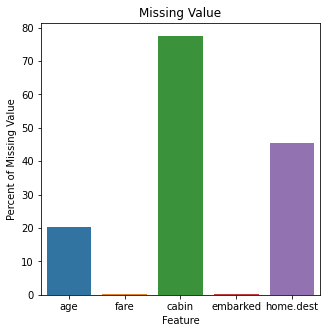

In [19]:
f, ax = plt.subplots(figsize = (5,5))
plt.xticks(rotation = '0')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.title('Missing Value')
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Percent of Missing Value')
plt.show()

In [20]:
train_original.describe()

,passenger_id,pclass,age,sibsp,parch,fare,survived
count,850.000000,850.000000,677.000000,850.000000,850.000000,849.000000,850.000000
mean,662.816471,2.318824,29.476243,0.522353,0.382353,34.012701,0.368235
std,380.751936,0.838277,14.595630,1.112132,0.879511,53.705779,0.482610
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,332.250000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,676.500000,3.000000,28.000000,0.000000,0.000000,14.108300,0.000000
75%,992.250000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,1307.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [21]:
train_original.describe(include = ['O'])

,name,sex,ticket,cabin,embarked,home.dest
count,850,850,850,191,849,464
unique,849,2,660,135,3,272
top,"Kelly, Mr. James",male,CA. 2343,B57 B59 B63 B66,S,"New York, NY"
freq,2,551,10,4,589,36


In [22]:
test_original.describe()

,passenger_id,pclass,age,sibsp,parch,fare
count,459.000000,459.000000,370.000000,459.000000,459.000000,459.000000
mean,637.673203,2.248366,30.541216,0.455338,0.389978,31.968854
std,372.769720,0.835467,14.133361,0.896176,0.840038,47.977896
min,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000
25%,317.000000,1.000000,21.250000,0.000000,0.000000,7.925000
50%,612.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,960.000000,3.000000,40.000000,1.000000,0.000000,31.387500
max,1308.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [23]:
test_original.describe(include = ['O'])

,name,sex,ticket,cabin,embarked,home.dest
count,459,459,459,104,458,281
unique,459,2,399,88,3,190
top,"Bystrom, Mrs. (Karolina)",male,2666,C23 C25 C27,S,"New York, NY"
freq,1,292,4,3,325,28


In [26]:
train_original[['pclass', 'survived']].groupby(['pclass'], as_index = False).mean().sort_values(by='survived', ascending = False)

,pclass,survived
0,1,0.606796
1,2,0.461078
2,3,0.232704


In [27]:
train_original[['embarked', 'survived']].groupby(['embarked'], as_index = False).mean().sort_values(by='survived', ascending = False)

,embarked,survived
0,C,0.517045
1,Q,0.345238
2,S,0.325976


In [28]:
train_original[['sex', 'survived']].groupby(['sex'], as_index = False).mean().sort_values(by='survived', ascending = False)

,sex,survived
0,female,0.702341
1,male,0.186933


In [29]:
train_original[['sibsp', 'survived']].groupby(['sibsp'], as_index = False).mean().sort_values(by='survived', ascending = False)

,sibsp,survived
1,1,0.502347
2,2,0.440000
0,0,0.333333
3,3,0.166667
4,4,0.142857
5,5,0.000000
6,8,0.000000


In [30]:
train_original[['parch', 'survived']].groupby(['parch'], as_index = False).mean().sort_values(by='survived', ascending = False)

,parch,survived
3,3,0.666667
1,1,0.557522
2,2,0.472222
0,0,0.327189
4,4,0.200000
5,5,0.000000
6,6,0.000000
7,9,0.000000


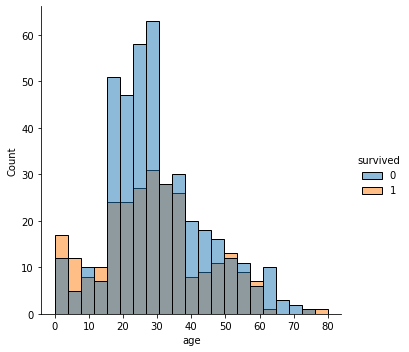

In [33]:
sns.displot(train_original, x = 'age', hue = 'survived');

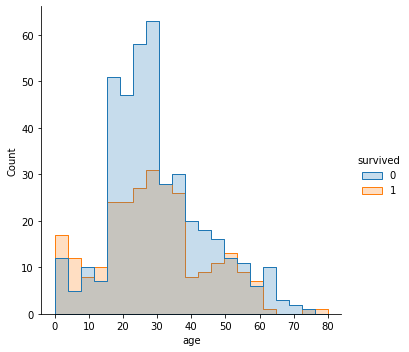

In [36]:
sns.displot(train_original, x = 'age', hue = 'survived', element = 'step');

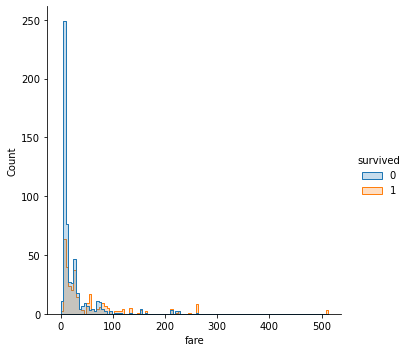

In [38]:
sns.displot(train_original, x = 'fare', hue = 'survived', element = 'step');

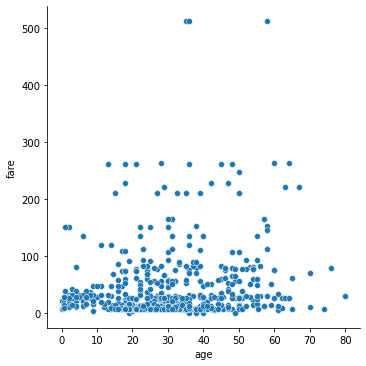

In [39]:
sns.relplot(x = 'age', y = 'fare', data = train_original)

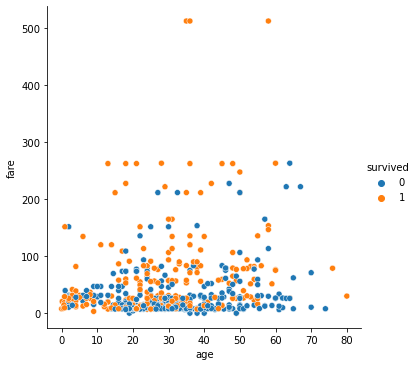

In [40]:
sns.relplot(x = 'age', y = 'fare',hue = 'survived', data = train_original)

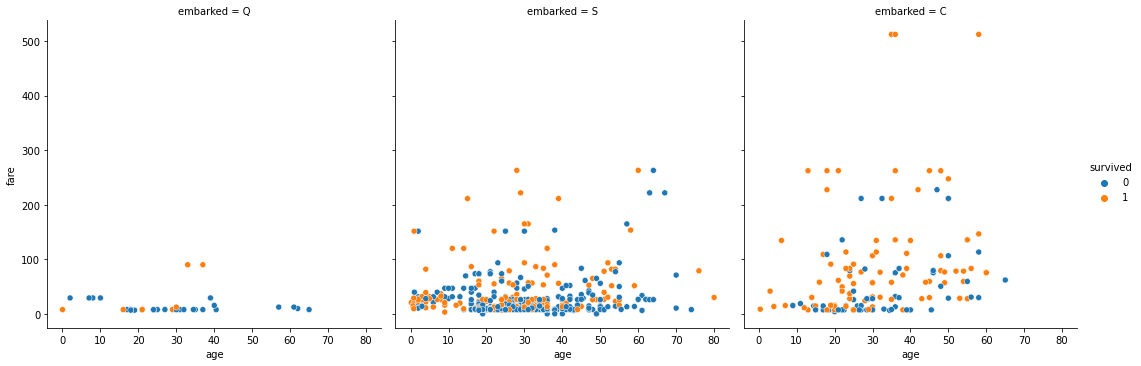

In [41]:
sns.relplot(x = 'age', y = 'fare',hue = 'survived', col= 'embarked', data = train_original)

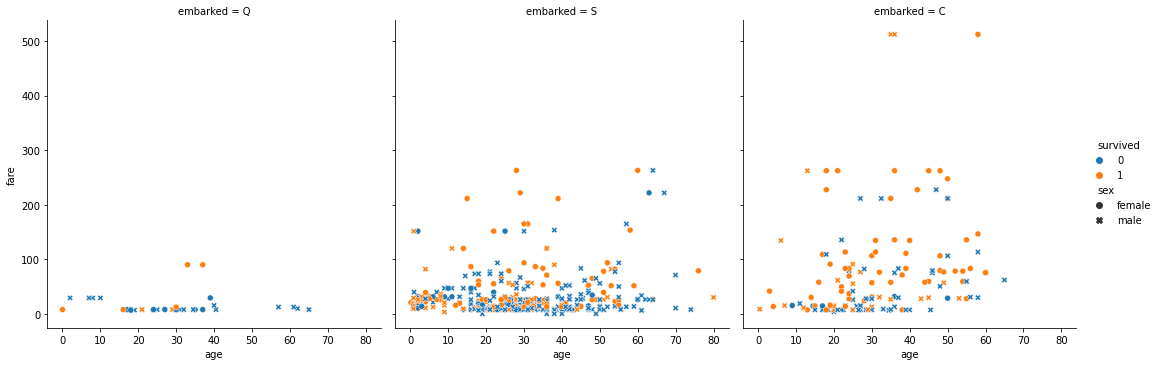

In [43]:
sns.relplot(x = 'age', y = 'fare',hue = 'survived',style='sex',col='embarked', data = train_original)

Text(0.5, 1.0, 'Percent Missing Values')

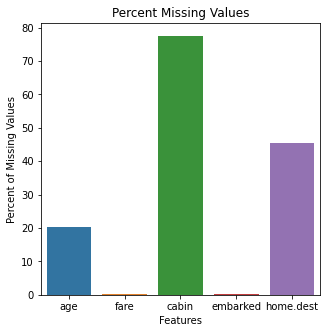

In [45]:
f, ax = plt.subplots(figsize = (5,5))
plt.xticks(rotation = '0')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Percent of Missing Values')
plt.title('Percent Missing Values')

<AxesSubplot:xlabel='survived', ylabel='age'>

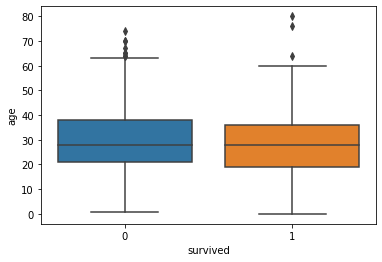

In [46]:
sns.boxplot(x = train_original['survived'], y = train_original['age'])

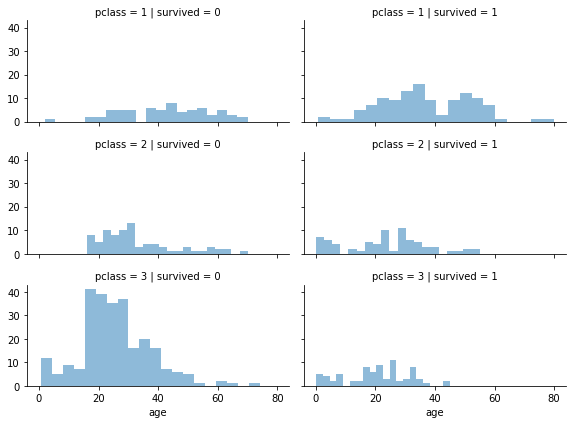

In [73]:
grid = sns.FacetGrid(train_original, col='survived', row='pclass', height=2 , aspect=2)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend();

In [55]:
combine = [train_original, test_original]
combine

[     passenger_id  pclass                                               name  \
 0            1216       2                                 Smyth, Miss. Julia   
 1             699       3                                    Cacic, Mr. Luka   
 2            1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
 3             449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
 4             576       2                                    Veal, Mr. James   
 ..            ...     ...                                                ...   
 845           158       1                        Hipkins, Mr. William Edward   
 846           174       1                            Kent, Mr. Edward Austin   
 847           467       2                Kantor, Mrs. Sinai (Miriam Sternin)   
 848          1112       3                          Peacock, Miss. Treasteall   
 849           425       2                              Greenberg, Mr. Samuel   
 
         sex   age  sibsp 

In [57]:
train_original = train_original.drop(['ticket', 'cabin', 'home.dest', 'passenger_id'], axis = 1)

In [58]:
test_original = test_original.drop(['ticket', 'cabin', 'home.dest', 'passenger_id'], axis = 1)

In [59]:
combine = [train_original, test_original]

In [60]:
train_original

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,2,"Smyth, Miss. Julia",female,0.0,0,0,7.7333,Q,1
1,3,"Cacic, Mr. Luka",male,38.0,0,0,8.6625,S,0
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,S,0
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,S,1
4,2,"Veal, Mr. James",male,40.0,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...
845,1,"Hipkins, Mr. William Edward",male,55.0,0,0,50.0000,S,0
846,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.7000,C,0
847,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,26.0000,S,1
848,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S,0


In [61]:
freq_port = train_original.embarked.dropna().mode()[0]
freq_port

'S'

In [62]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)

In [64]:
train_original.isnull().sum()

pclass        0
name          0
sex           0
age         173
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [79]:
#for dataset in combine:
#   dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\ expand = False)

In [69]:
#train_original[['title', 'survived']].groupby(['title'], as_index = False).mean()

In [70]:
for dataset in combine:
    dataset['sex'] = dataset['sex'].map({'female':1, 'male':0}).astype(int)

In [71]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [72]:
train_original

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,2,"Smyth, Miss. Julia",1,0.0,0,0,7.7333,2,1
1,3,"Cacic, Mr. Luka",0,38.0,0,0,8.6625,0,0
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.0,1,1,24.1500,0,0
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.0,1,3,23.0000,0,1
4,2,"Veal, Mr. James",0,40.0,0,0,13.0000,0,0
...,...,...,...,...,...,...,...,...,...
845,1,"Hipkins, Mr. William Edward",0,55.0,0,0,50.0000,0,0
846,1,"Kent, Mr. Edward Austin",0,58.0,0,0,29.7000,1,0
847,2,"Kantor, Mrs. Sinai (Miriam Sternin)",1,24.0,1,0,26.0000,0,1
848,3,"Peacock, Miss. Treasteall",1,3.0,1,1,13.7750,0,0


In [74]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])